# Imports

In [25]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

# A

In [2]:
df = pd.read_csv('./data/car_data.csv')
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [3]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


# B

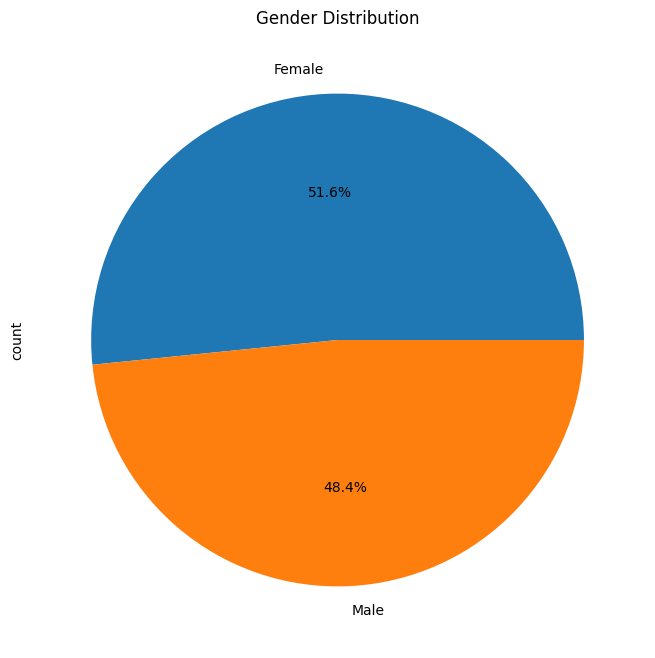

In [4]:
gender_counts = df['Gender'].value_counts()
pie_chart = gender_counts.plot.pie(autopct="%.1f%%", figsize=(8, 8))
plt.title('Gender Distribution')
plt.show()

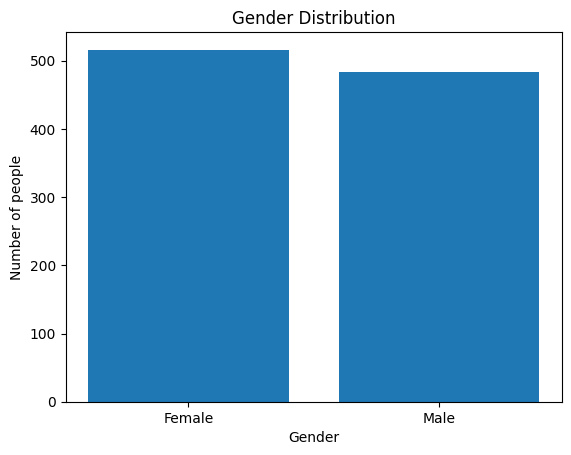

In [5]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.title('Gender Distribution')
plt.show()

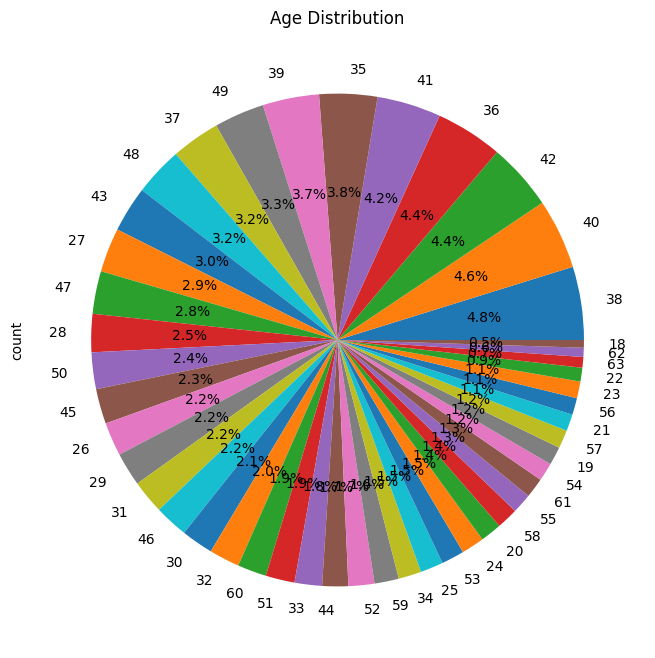

In [6]:
age_counts = df['Age'].value_counts()
pie_chart = age_counts.plot.pie(autopct="%1.1f%%", figsize=(8, 8))
plt.title('Age Distribution')
plt.show()

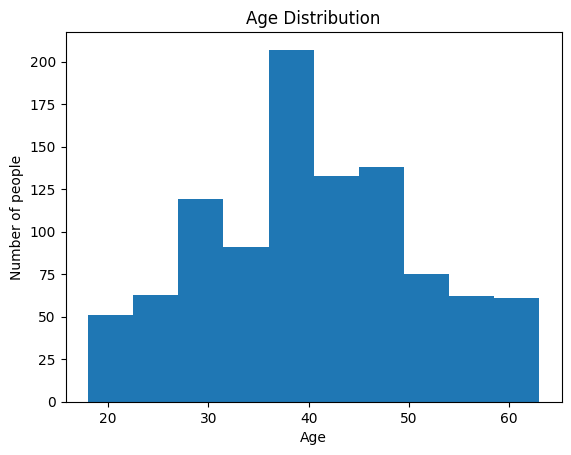

In [7]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age Distribution')
plt.show()

# C

In [8]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [9]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


# D

In [10]:
std = StandardScaler()
X_std = std.fit_transform(df.iloc[:, 1:-1])

In [11]:
X_train, X_test, Y_train, Y_test  = train_test_split(X_std,df['Purchased'], test_size=0.2)

In [12]:
Y_train = Y_train.to_numpy()  # Change data type to numpy
Y_test = Y_test.to_numpy()

In [13]:
Y_train = Y_train.reshape((-1, 1)) # Change shape to be compatible with the model
Y_test = Y_test.reshape((-1, 1))

# E

In [30]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z)) # Sigmoid function

In [31]:
def cross_entropy(predicted_probabilities, labels):
  loss = 0
  for i in range(len(predicted_probabilities)):
    # Calculate the loss for each sample based on its true label
    if labels[i] == 1:
      loss += -np.log(predicted_probabilities[i]) # For class 1
    else:
      loss += -np.log(1 - predicted_probabilities[i]) # For class 0
  # Calculate the average loss
  return loss / len(predicted_probabilities)

In [32]:
def prediction(weights, bias, data):
  return sigmoid(np.dot(data, weights)+bias)

In [36]:
def update_weights(weights, bias, data, y, alpha):
  predicted_probabilities = prediction(weights, bias, data) # Predicted probabilities
  accuracy = accuracy_score(y, predicted_probabilities > 0.5) # Calculate accuracy
  loss = cross_entropy(predicted_probabilities, y) # Calculate loss
  weights_gradient = np.dot(data.T, (predicted_probabilities - y)) / len(data) # Calculate weights gradient
  bias_gradient = np.sum(predicted_probabilities - y) / len(data) # Calculate bias gradient
  new_weights = weights - alpha * weights_gradient # Update weights 
  new_bias = bias - alpha * bias_gradient # Update bias
  return new_weights, new_bias, loss, accuracy

In [43]:
def logistic_regression(data, labels, alpha, num_epochs):
  weights = np.zeros((data.shape[1],1)) # Initialize weights
  bias = 0 # Initialize bias
  hist = [] # Create a list to store loss
  acc = [] # Create a list to store accuracy
  for index in range(num_epochs):
      weights, bias, loss, accuracy = update_weights(weights, bias, data, labels, alpha) # Update weights and bias
      hist.append(loss) # Append loss
      acc.append(accuracy) # Append accuracy
      print(f'Epoch: {index}, Loss: {loss}, Accuracy: {accuracy}')
  return weights, bias, hist, acc

# F

In [44]:
weights, bias, hist, accuracy = logistic_regression(X_train, Y_train, 0.01, 1000) # Train the model based on the training set

Epoch: 0, Loss: [0.69314718], Accuracy: 0.61375
Epoch: 1, Loss: [0.69173988], Accuracy: 0.83
Epoch: 2, Loss: [0.69034074], Accuracy: 0.83
Epoch: 3, Loss: [0.68894971], Accuracy: 0.83
Epoch: 4, Loss: [0.68756676], Accuracy: 0.83
Epoch: 5, Loss: [0.68619183], Accuracy: 0.83
Epoch: 6, Loss: [0.68482487], Accuracy: 0.83
Epoch: 7, Loss: [0.68346583], Accuracy: 0.83
Epoch: 8, Loss: [0.68211468], Accuracy: 0.83
Epoch: 9, Loss: [0.68077135], Accuracy: 0.83
Epoch: 10, Loss: [0.67943581], Accuracy: 0.83
Epoch: 11, Loss: [0.678108], Accuracy: 0.83
Epoch: 12, Loss: [0.67678789], Accuracy: 0.83
Epoch: 13, Loss: [0.67547542], Accuracy: 0.83
Epoch: 14, Loss: [0.67417055], Accuracy: 0.83
Epoch: 15, Loss: [0.67287322], Accuracy: 0.83
Epoch: 16, Loss: [0.6715834], Accuracy: 0.83
Epoch: 17, Loss: [0.67030104], Accuracy: 0.83
Epoch: 18, Loss: [0.66902609], Accuracy: 0.82875
Epoch: 19, Loss: [0.66775851], Accuracy: 0.82875
Epoch: 20, Loss: [0.66649825], Accuracy: 0.82875
Epoch: 21, Loss: [0.66524527], Accu

# G

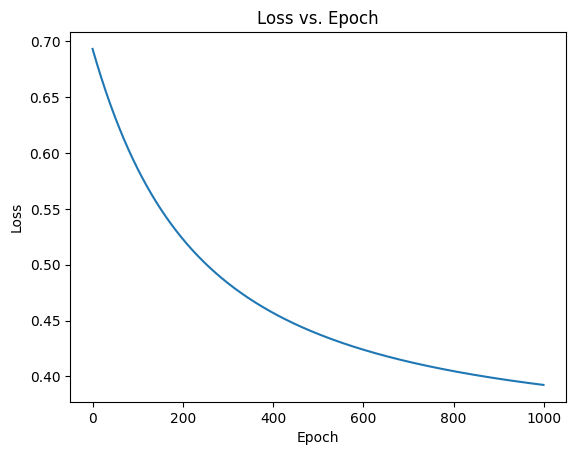

In [45]:
plt.plot(hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

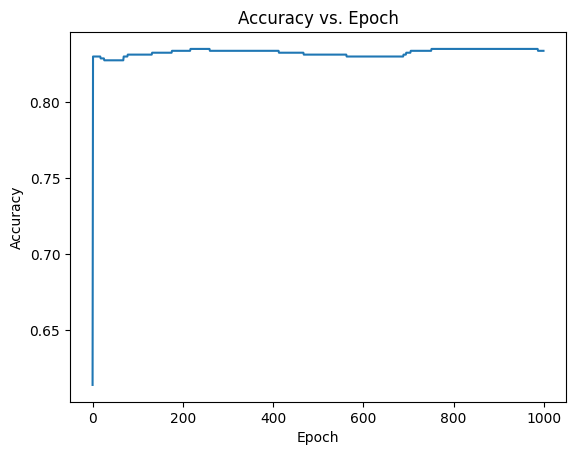

In [46]:
plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.show()

# H

In [50]:
y_predic = prediction(weights, bias, X_test) # Predict on the test set
loss = cross_entropy(y_predic, Y_test) # Calculate loss
accuracy = accuracy_score(Y_test, y_predic > 0.5) # Calculate accuracy
print(f'Loss on Test Set: {100*loss[0]}%, Accuracy on Test Set: {100*accuracy}%') 

Loss on Test Set: 45.01500452927513%, Accuracy on Test Set: 78.5%
